<a href="https://colab.research.google.com/github/dwikifkurniawan/DTL-RPL/blob/main/DTL_RPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning

1. Membaca Data Menggunakan Pandas

In [ ]:
import pandas as pd
#untuk memanage data kita

In [ ]:
data_path = "/content/drive/MyDrive/RPL TUBES/tes2.csv"
#membaca data dari data_path
df = pd.read_csv(data_path)
#menampilkan jumlah data
print("Jml data: ", df.shape[0])
#menampilkan 5 data teratas
df

Jml data:  80


,harga,kategori,release,label
0,5000000,1,33,tidak
1,2899000,1,33,tidak
2,2899000,1,3,tidak
3,2600000,1,28,tidak
4,1449000,1,50,ya
...,...,...,...,...
75,2330000,4,26,tidak
76,910000,4,11,tidak
77,599000,4,43,tidak
78,1110000,4,30,tidak


2. Encode Label menjadi Integer

In [ ]:
#import SKLEARN Preprocessing
from sklearn import preprocessing

#Encode label kita menjadi bilangan integer

#label itu target dijadikan sebagai output
le = preprocessing.LabelEncoder()
le.fit(df.label)
Y = le.transform(df.label)
he = preprocessing.LabelEncoder()
he.fit(df.kategori)
Z = he.transform(df.kategori)
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
#menampilkan
list(le.classes_)

['tidak', 'ya']

3. Hapus kolom label dari data


In [ ]:
X = df.drop("label", axis=1)
X

,harga,kategori,release
0,5000000,1,33
1,2899000,1,33
2,2899000,1,3
3,2600000,1,28
4,1449000,1,50
...,...,...,...
75,2330000,4,26
76,910000,4,11
77,599000,4,43
78,1110000,4,30


4. Bagi data menjadi Train Data dan Test Data

In [ ]:
#import library SKLEARN Train-test split
from sklearn.model_selection import train_test_split

#bagi data
#train = input training
#test = input testnya
#X = input
#Y = Label
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=123, stratify = df[["kategori", "label"]])
#Stratify = membagi merata
X_test #menampilkan X/Y test

,harga,kategori,release
5,1160000,1,50
2,2899000,1,3
48,840000,3,40
24,2090000,2,5
30,2630000,2,18
64,187000,4,31
46,1350000,3,30
9,1014000,1,4
50,1499000,3,15
25,750000,2,26


5. Lakukan Klafisikasikan dengan DTL

5.1 Buat Model DTL dengan lakukan training

In [ ]:
#import model DTL
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#Buat model
#masih kosong
model = DecisionTreeClassifier(random_state=1234)

#melakukan trainingnya
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

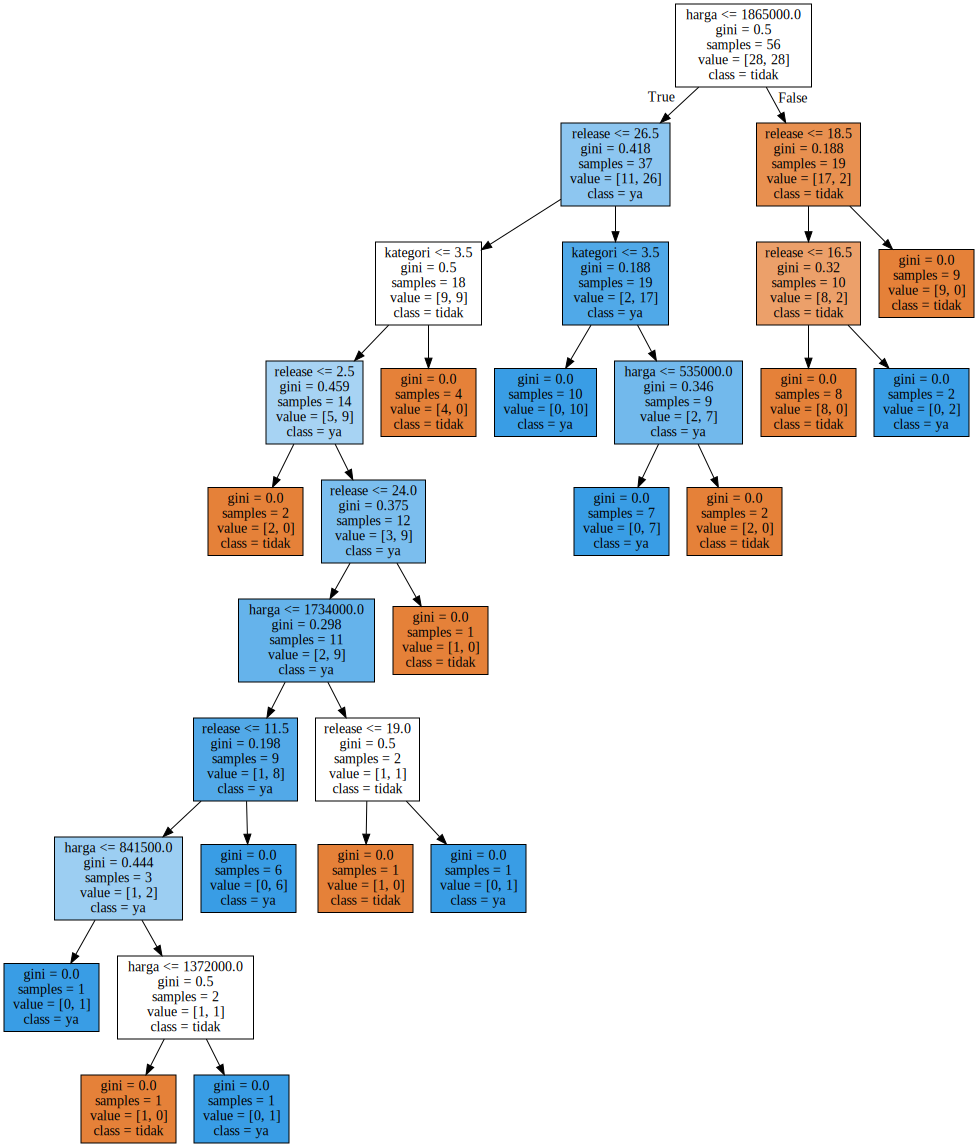

In [ ]:
#Memvisualisasikan
import graphviz
#export model ke bentuk graphiz
dot_data = export_graphviz(model,feature_names=list(X.columns),#ngasih nama kolom dari data x kita
                           class_names=list(le.classes_),#namanya dari list
                           filled = True)

#Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

5.2 Evaluasi Model/Testing

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test) #yang di predik X test kumpulan test

#hitung akurasi
#Y test = kunci jawabannya
#Y pred akurasinya
acc = accuracy_score(Y_test, Y_pred) 
print("Akurasi {}". format(acc))
print()
print("Classification Report: ")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix: ")
confusion_matrix(Y_test, Y_pred)

Akurasi 0.8333333333333334

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      0.83      0.83        12

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24

Confusion Matrix: 


array([[10,  2],
       [ 2, 10]])

In [ ]:
res = Y_pred == Y_test
print(Y_pred)
print(Y_test)

[1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0]
[1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0]


In [ ]:
akurasi = sum(res)/len(Y_test) #yang error
akurasi

0.8333333333333334